# 1. Import Necessasry Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3. Data Understanding

#### 3.1 Initial Analysis

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

#### 3.2 Assumptions Check

###### Assumption 1: Test for Linearity

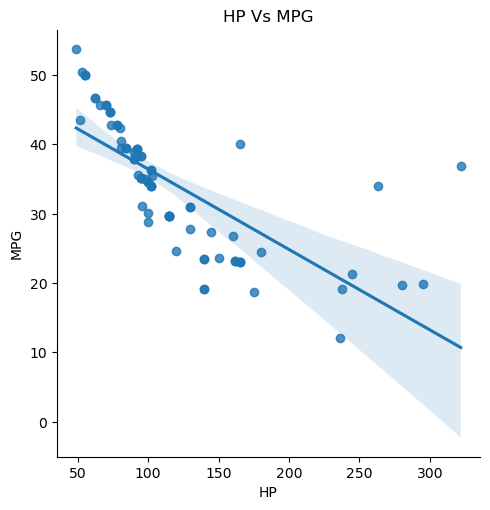

In [6]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

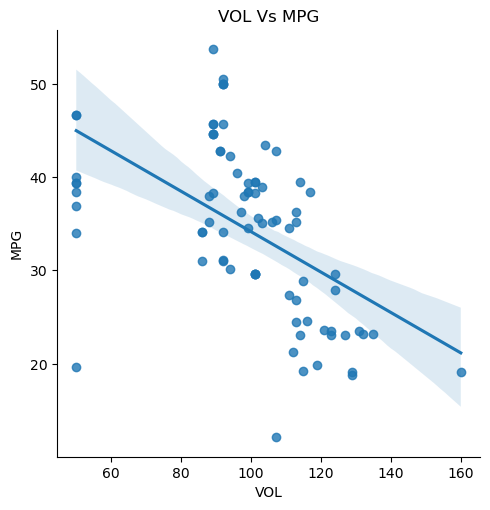

In [7]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

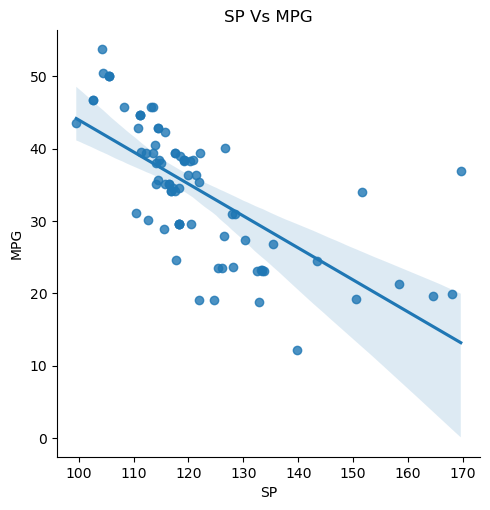

In [8]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

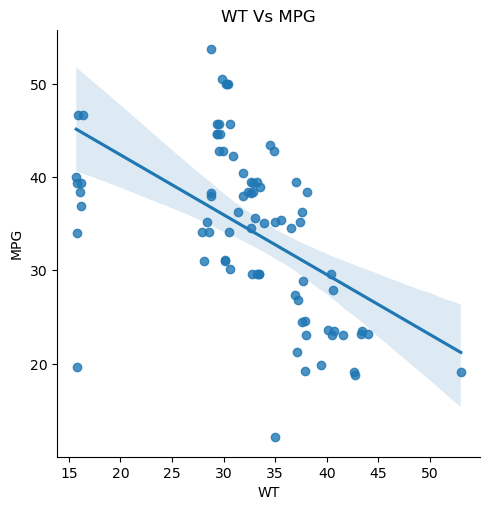

In [9]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

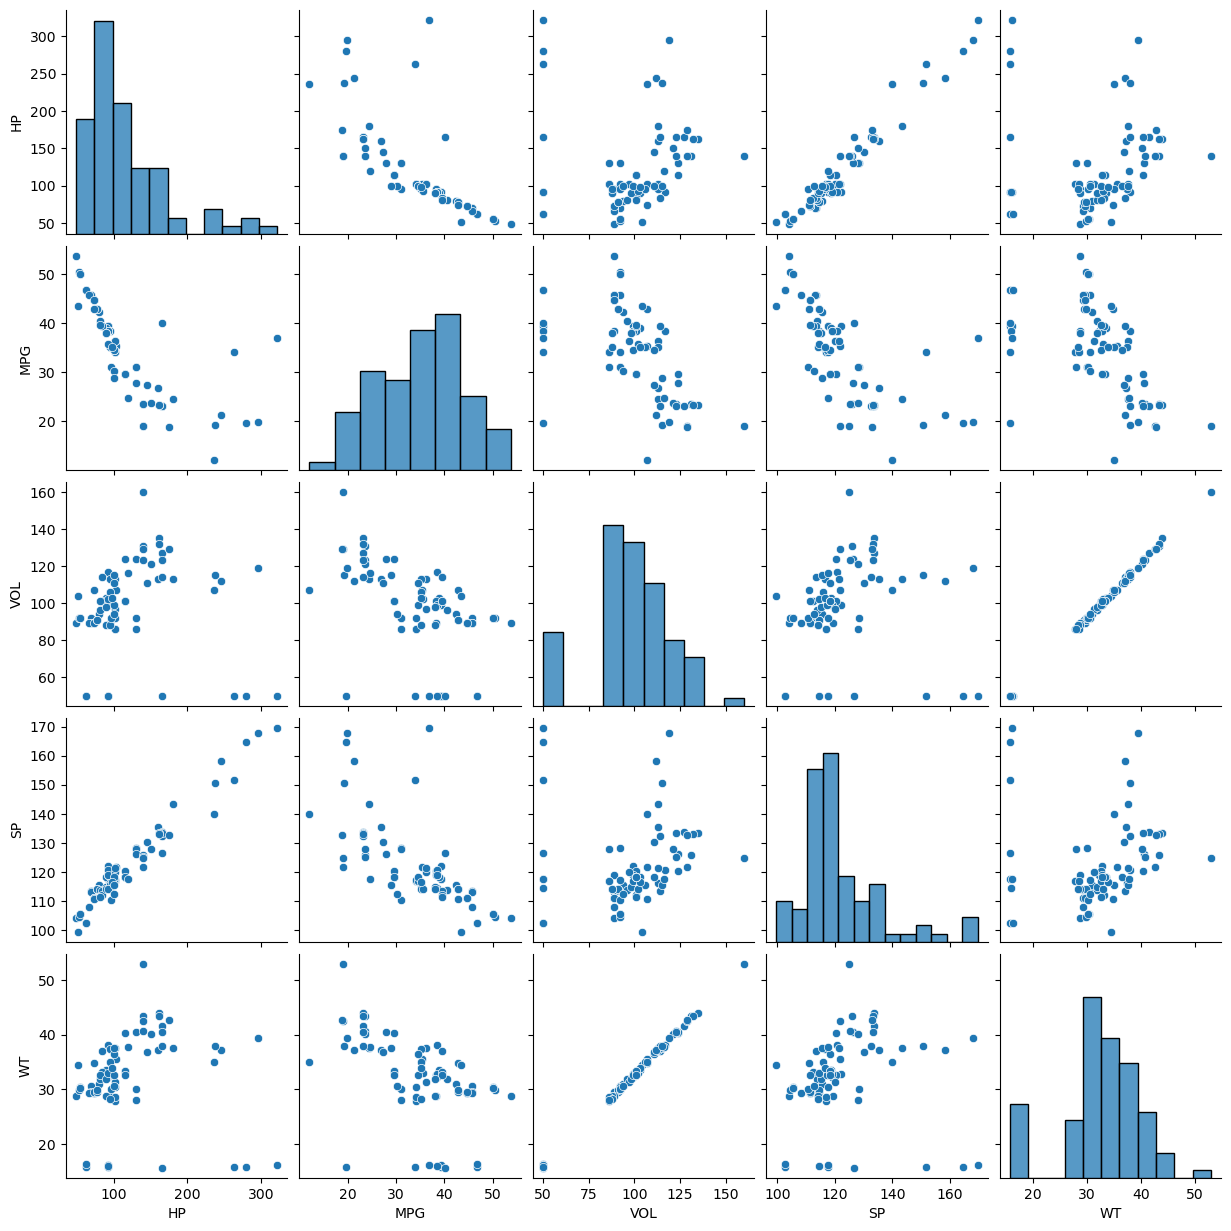

In [10]:
sns.pairplot(data = cars_data)
plt.show()

#### Observation
##### Linearity Test is FAILED

# 2. Test for Normality

#### 2.1 Using Distplot

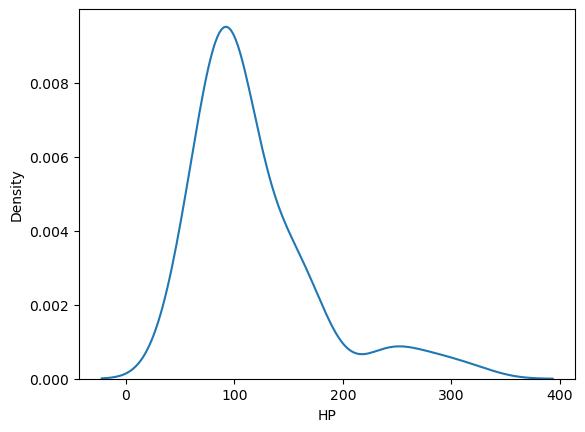

In [13]:
sns.distplot(a=cars_data['HP'],hist = False)
plt.show()

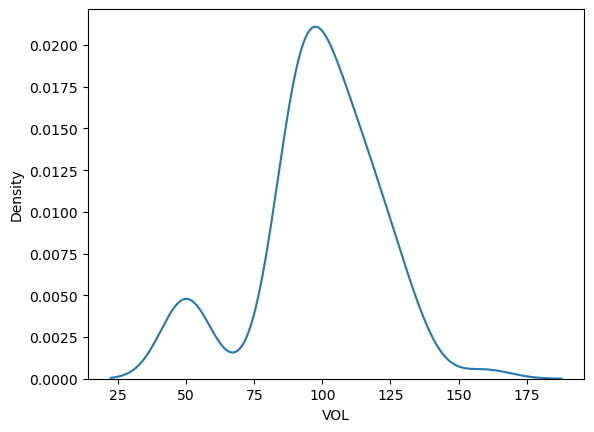

In [14]:
sns.distplot(a=cars_data['VOL'],hist = False)
plt.show()

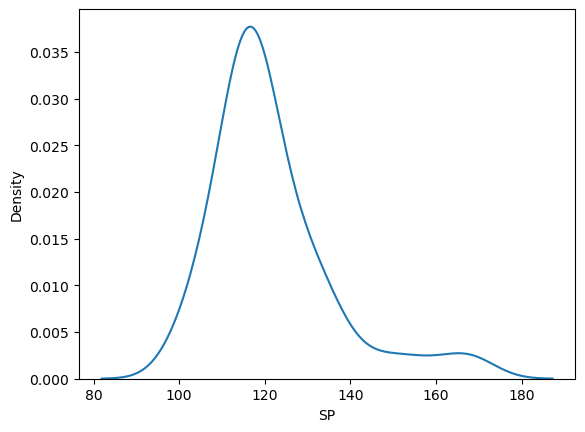

In [15]:
sns.distplot(a=cars_data['SP'],hist = False)
plt.show()

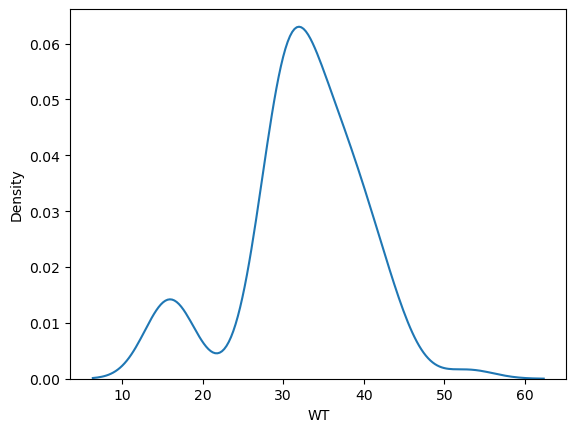

In [16]:
sns.distplot(a=cars_data['WT'],hist = False)
plt.show()

### Observation 
#### Normality Test Fails.

### 2.1 Using Probplot

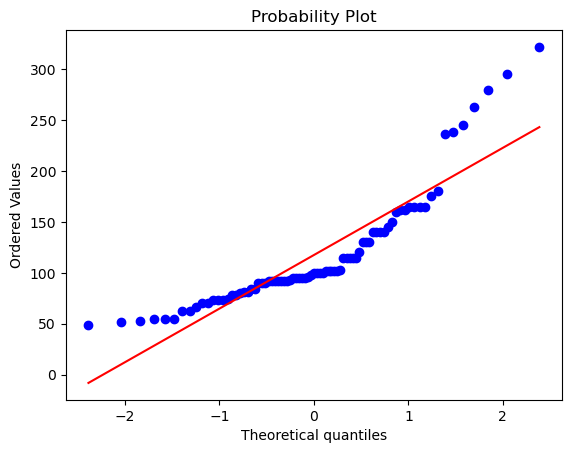

In [12]:
from scipy import stats
stats.probplot(x=cars_data['HP'],dist='norm',plot=plt)
plt.show()

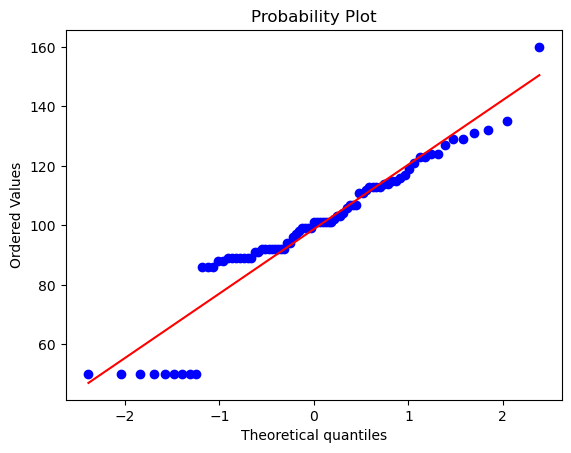

In [17]:
stats.probplot(x=cars_data['VOL'],dist='norm',plot=plt)
plt.show()

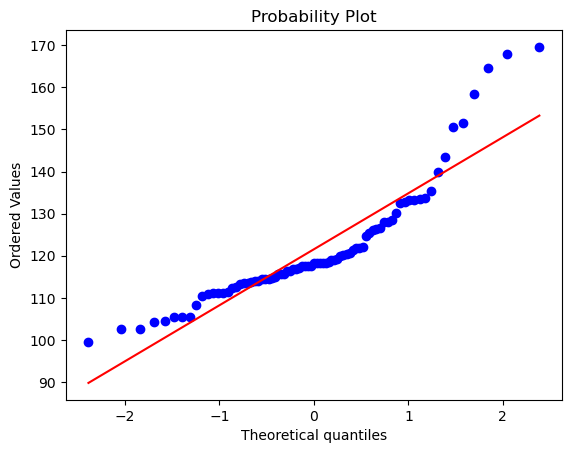

In [18]:
stats.probplot(x=cars_data['SP'],dist='norm',plot=plt)
plt.show()

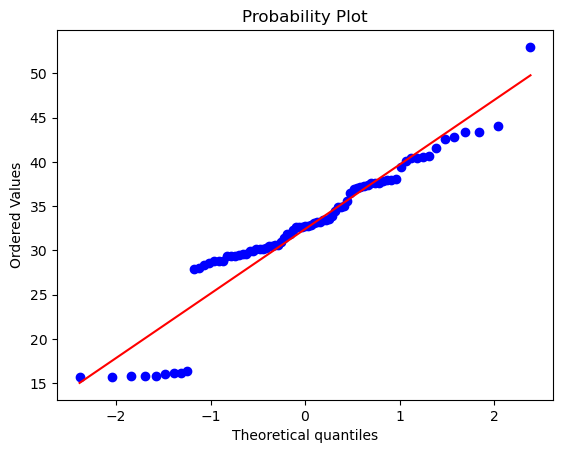

In [19]:
stats.probplot(x=cars_data['WT'],dist='norm',plot=plt)
plt.show()

### Observation
#### Normality Test FAILED

# 3. Test for Multicollinearity

###### By using 2 Techniques.

###### 1. Correlation Matrix
##### 2. Variance Inflation Factor (VIF)

#### 3.1 Correlation Matrix

In [11]:
corr_matrix = cars_data.corr().round(2)
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


In [ ]:
sns.heatmap(data = corr_matrix, annot = True)
plt.show()

### Observation:
#### There is multicollinearity in my data. so this Test also Fails

# 4. No AutoRegression - Passed

### Model Buliding

In [47]:
x = cars_data.drop(labels=['MPG'],axis = 1)
# x = cars_data[['HP','VOL','SP','WT']]
y = cars_data[['MPG']]

In [48]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [49]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


### Model Training

In [51]:
from sklearn.linear_model import LinearRegression
linear_model_1 = LinearRegression()
linear_model_1.fit(x,y) #model build

LinearRegression()

### Model Testing

In [52]:
y_pred = linear_model_1.predict(x)
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

### Model Evaluation

In [53]:
error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


### Scaling of Data

In [54]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# scaled_x = StandardScaler()
scaled_x = std_scaler.fit_transform(x)
scaled_x

array([[-1.20629511, -0.44061061, -1.23140253, -0.49023816],
       [-1.1005866 , -0.30525236, -1.14087145, -0.26129934],
       [-1.1005866 , -0.30525236, -1.14087145, -0.29799301],
       [-0.83631531, -0.30525236, -0.57323872, -0.2391033 ],
       [-1.13582277, -0.30525236, -1.21182554, -0.33887816],
       [-0.83631531, -0.44061061, -0.59281571, -0.37881419],
       [-1.1005866 , -0.30525236, -1.14087145, -0.28256505],
       [-0.97726   , -2.20026792, -1.34399532, -2.22453536],
       [-0.97726   , -2.20026792, -1.34399532, -2.15581433],
       [-0.66013445, -0.21501352, -0.4182792 , -0.20042158],
       [-0.78346105, -0.44061061, -0.73472389, -0.40949027],
       [-0.44871742, -2.20026792, -0.27968395, -2.23718888],
       [-0.44871742,  0.01058357,  0.04007367,  0.05385348],
       [-0.78346105, -0.44061061, -0.73472389, -0.40746314],
       [-0.90678765, -0.44061061, -0.94758617, -0.41164734],
       [-0.78346105, -0.44061061, -0.73472389, -0.37710085],
       [-0.69537062, -0.

In [55]:
scaled_x = pd.DataFrame(data = scaled_x, columns = ['HP','VOL','SP','WT'])
scaled_x

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [56]:
scaled_x.mean()

HP    -6.579099e-17
VOL    1.021131e-16
SP     1.345974e-15
WT     1.091034e-15
dtype: float64

In [57]:
scaled_x.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

### Model Training

In [58]:
from sklearn.linear_model import LinearRegression
linear_model_2 = LinearRegression()
linear_model_2.fit(scaled_x,y)

LinearRegression()

### Model Testing

In [59]:
y_pred = linear_model_2.predict(scaled_x)
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

### Model Evaluation

In [60]:
error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


# 5. Test for Homoscesdasticity

In [ ]:
plt.scatter(x = scaled_x['HP'], y=error)
plt.title('Homoscedsticity Check - Scaled_HP Vs Error')
plt.xlabel('Scaled_HP')
plt.ylabel('Error')
plt.show()

In [ ]:
plt.scatter(x = scaled_x['VOL'], y=error)
plt.title('Homoscedsticity Check - Scaled_VOL Vs Error')
plt.xlabel('Scaled_HP')
plt.ylabel('Error')
plt.show()

In [ ]:
plt.scatter(x = scaled_x['SP'], y=error)
plt.title('Homoscedsticity Check - Scaled_SP Vs Error')
plt.xlabel('Scaled_HP')
plt.ylabel('Error')
plt.show()

In [ ]:
plt.scatter(x = scaled_x['WT'], y=error)
plt.title('Homoscedsticity Check - Scaled_WT Vs Error')
plt.xlabel('Scaled_HP')
plt.ylabel('Error')
plt.show()

### Observation 
#### Homoscedascity Check FAILED

# 6. Test for Zero Residual Mean

In [ ]:
y

In [ ]:
plt.scatter(x = y, y = y_pred)
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Observation
#### Zero Residual Mean Test is also Fails

# ===============================================================

# Use Statsmodels for Linear Regression

In [20]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [22]:
x = cars_data.drop(labels = 'MPG',axis=1)

In [23]:
import statsmodels.formula.api as smf
lin_model_1 = smf.ols(formula = 'MPG ~ HP + VOL + SP + WT',data = cars_data).fit()
y_pred = lin_model_1.predict(x)

In [24]:
lin_model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [25]:
lin_model_1.summary()
# lin_model_1.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.54e-23
Time:                        11:26:31   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ============================================================

#  Hypothesis Formulation

##### H0: The input feature 'X' is not significant


##### HA: It is significant.

##### Level of Significance : 5%

# ============================================================

In [26]:
lin_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.54e-23
Time:                        11:28:39   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print('R2 Score          :',round(lin_model_1.rsquared,5)) #Contribution of the input feature towards prediction
print('Adjusted R2 Score :',round(lin_model_1.rsquared_adj,5)) #Contribution of the input feature towards prediction
print('AIC               :',round(lin_model_1.aic,4))
print('BIC               :',round(lin_model_1.bic,4))

R2 Score          : 0.77054
Adjusted R2 Score : 0.75846
AIC               : 477.9279
BIC               : 489.9002


In [28]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula = 'MPG ~ HP',data = cars_data).fit()

In [29]:
print('R2 Score          :',round(model_1.rsquared,5)) #Contribution of the input feature towards prediction
print('Adjusted R2 Score :',round(model_1.rsquared_adj,5)) #Contribution of the input feature towards prediction
print('AIC               :',round(model_1.aic,4))
print('BIC               :',round(model_1.bic,4))

R2 Score          : 0.52568
Adjusted R2 Score : 0.51968
AIC               : 530.7453
BIC               : 535.5342


In [ ]:
model_1.summary()

In [30]:
model_2 = smf.ols(formula = 'MPG ~ HP + VOL',data = cars_data).fit()

print('R2 Score          :',round(model_2.rsquared,5)) #Contribution of the input feature towards prediction
print('Adjusted R2 Score :',round(model_2.rsquared_adj,5)) #Contribution of the input feature towards prediction
print('AIC               :',round(model_2.aic,4))
print('BIC               :',round(model_2.bic,4))

R2 Score          : 0.75066
Adjusted R2 Score : 0.74427
AIC               : 480.6569
BIC               : 487.8403


In [ ]:
model_2.summary()

In [31]:
model_3 = smf.ols(formula = 'MPG ~ HP + VOL + SP',data = cars_data).fit()

print('R2 Score          :',round(model_3.rsquared,5)) #Contribution of the input feature towards prediction
print('Adjusted R2 Score :',round(model_3.rsquared_adj,5)) #Contribution of the input feature towards prediction
print('AIC               :',round(model_3.aic,4))
print('BIC               :',round(model_3.bic,4))

R2 Score          : 0.77037
Adjusted R2 Score : 0.76142
AIC               : 475.9875
BIC               : 485.5653


In [ ]:
model_3.summary()

In [32]:
model_4 = smf.ols(formula = 'MPG ~ HP + VOL + SP + WT',data = cars_data).fit()

print('R2 Score          :',round(model_4.rsquared,5)) #Contribution of the input feature towards prediction
print('Adjusted R2 Score :',round(model_4.rsquared_adj,5)) #Contribution of the input feature towards prediction
print('AIC               :',round(model_4.aic,4))
print('BIC               :',round(model_4.bic,4))

R2 Score          : 0.77054
Adjusted R2 Score : 0.75846
AIC               : 477.9279
BIC               : 489.9002


In [ ]:
model_4.summary()

# Build using sklearn library

In [33]:
x = cars_data.drop(labels = 'MPG',axis=1)
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [35]:
y = cars_data[['MPG']]
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [36]:
x.shape,y.shape

((81, 4), (81, 1))

In [37]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=19)

In [38]:
x_train.shape,y_train.shape

((64, 4), (64, 1))

In [39]:
x_test.shape,y_test.shape

((17, 4), (17, 1))

In [40]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train) # Training Data

LinearRegression()

In [41]:
y_pred_train = lin_model.predict(x_train)
y_pred_test = lin_model.predict(x_test)

# Model Testing

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
mean_squared_error(y_train,y_pred_train) # Train data error

21.126570972543902

In [44]:
mean_squared_error(y_test,y_pred_test)

10.862695268158163

In [45]:
mean_absolute_error(y_train,y_pred_train)

3.475798738281426

In [46]:
mean_absolute_error(y_test,y_pred_test)

2.4978433194483025